In [1]:
import pandas as pd

In [4]:
iris_df = pd.read_csv("Iris.csv", index_col = "Id")
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
iris_df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Handling data normalization

Data normalization is the process of transforming data into a common scale or range, to eliminate differences in magnitude and make the data more comparable and interpretable. Normalization is an important step in data preprocessing, as it can improve the accuracy and performance of machine learning models and other data analysis techniques.

1. **Min-Max Normalization**

This method scales the data to a fixed range, typically between 0 and 1. The formula for min-max normalization is:

```python
x_norm = (x - x_min) / (x_max - x_min)
```

In [33]:
min_length = iris_df.SepalLengthCm.min()
max_length = iris_df.SepalLengthCm.max()

norma_length = (iris_df.SepalLengthCm - min_length) / (max_length - min_length)

In [34]:
norma_length.describe()

count    150.000000
mean       0.428704
std        0.230018
min        0.000000
25%        0.222222
50%        0.416667
75%        0.583333
max        1.000000
Name: SepalLengthCm, dtype: float64

<Axes: ylabel='Density'>

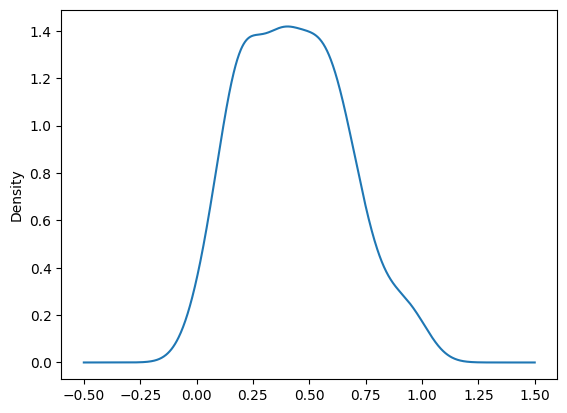

In [36]:
norma_length.plot.kde()

### ✅ **What Min-Max Scaling Preserves:**
1. **Relative Order of Values (Monotonicity)**:  
   - If one value is greater than another before scaling, it remains greater after scaling.
   - Example: If \( x_1 < x_2 \) in the original data, then \( x'_1 < x'_2 \) after scaling.

2. **Proportional Spacing (Linear Transformation)**:  
   - The distance between values is proportionally reduced or expanded within the new scale.

3. **Feature Relationships**:  
   - If two features have a strong correlation before scaling, the correlation remains the same after scaling.

---

### ❌ **What Min-Max Scaling Does NOT Preserve:**
1. **Outlier Effects**:  
   - Since Min-Max scaling compresses all values into a fixed range (e.g., [0,1] or [-1,1]), outliers can **dominate the scaling** and distort patterns.
   - Example: If one value is an extreme outlier, all other values will be squashed closer together.

2. **Absolute Differences**:  
   - Since all values are mapped to a fixed range, differences between large and small values may lose interpretability.

3. **Gaussian Distributions**:  
   - If the original data is normally distributed, Min-Max scaling does not maintain the bell-shaped distribution.

---

### 🔹 **Conclusion:**
- **For data with a uniform range and without extreme outliers**, Min-Max scaling **preserves patterns well**.
- **For data with outliers or a skewed distribution**, Min-Max scaling may **distort the structure**, and alternatives like **Z-score normalization (StandardScaler)** may be better.


In [22]:
# sklearn
# !pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
norm_data = minmax_scaler.fit_transform(
    iris_df.drop("Species", axis = 1)
    # iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
)

In [25]:
pd.DataFrame(norm_data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [28]:
pd.DataFrame(norm_data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


2. **Z-score Normalization / StandardScaler**

   This method scales the data to have zero mean and unit variance. The formula for z-score normalization is:

```python
x_norm = (x - mean) / std
```

where `x` is the original value, `mean` and `std` are the mean and standard deviation of the data, respectively, and `x_norm` is the normalized value.

In [29]:
mean_length = iris_df.SepalLengthCm.mean()
std_length = iris_df.SepalLengthCm.std()

norma_length = (iris_df.SepalLengthCm - mean_length) / std_length

In [31]:
round(norma_length.describe(), 5)

count    150.00000
mean      -0.00000
std        1.00000
min       -1.86378
25%       -0.89767
50%       -0.05233
75%        0.67225
max        2.48370
Name: SepalLengthCm, dtype: float64

<Axes: ylabel='Density'>

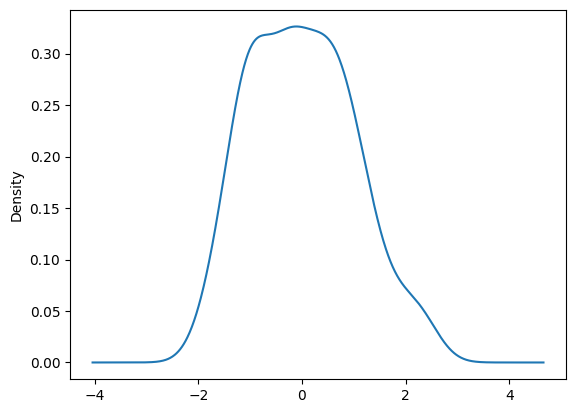

In [32]:
norma_length.plot.kde()

**Min-Max Scaler vs. StandardScaler: A Comparison**

Both **MinMaxScaler** and **StandardScaler** are commonly used for feature scaling in machine learning, but they behave differently and are suited for different situations.

**Comparison Table**
| Feature            | MinMaxScaler | StandardScaler |
|-------------------|-------------|---------------|
| **Range** | [0,1] (or custom range) | Mean = 0, Std = 1 |
| **Effect of Outliers** | Strong (compresses values) | Moderate (shifts distribution) |
| **Preserves Distribution?** | Yes (but not spacing) | No (reshapes to standard normal) |
| **Preserves Order?** | Yes | No (relative spacing changes) |
| **Best For?** | ML models needing bounded input (NN, KNN) | ML models assuming normal distribution (PCA, LR, SVM) |


In [38]:
# Sklearn

from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

In [39]:
norm_data = st_scaler.fit_transform(
    iris_df.drop("Species", axis = 1)
    # iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
)

In [47]:
pd.DataFrame(norm_data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [48]:
pd.DataFrame(norm_data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


3. **Log transformation:**

   This method applies a logarithmic function to the data, to reduce the range of values and make the data more symmetric and normally distributed. The formula for log normalization is:

```python
x_norm = log(x)
```

where `x` is the original value, and `x_norm` is the normalized value.

In [55]:
import numpy as np
data = np.arange(10, 50000, 50)

In [61]:
np.log(data).max()

np.float64(10.818977964239513)

In [65]:
transformed_data = np.log(iris_df.drop("Species", axis = 1))
transformed_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,1.629241,1.252763,0.336472,-1.609438
2,1.589235,1.098612,0.336472,-1.609438
3,1.547563,1.163151,0.262364,-1.609438
4,1.526056,1.131402,0.405465,-1.609438
5,1.609438,1.280934,0.336472,-1.609438


In [64]:
transformed_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,1.755393,1.106442,1.175498,-0.176944
std,0.141189,0.142341,0.589493,0.991394
min,1.458615,0.693147,0.000000,-2.302585
25%,1.629241,1.029619,0.470004,-1.203973
50%,1.757858,1.098612,1.470110,0.262364
75%,1.856298,1.193922,1.629241,0.587787
max,2.066863,1.481605,1.931521,0.916291


4. **Power Transformation:**

   This method applies a power function to the data, to adjust the skewness and kurtosis of the distribution and make the data more symmetric and normally distributed. The formula for power normalization is:

```python
x_norm = sign(x) * abs(x) ** a
```

where `x` is the original value, `a` is the power parameter (typically between 0 and 1), `sign` is the sign function that returns the sign of x (+1 or -1), and `abs` is the absolute value function. The normalized value `x_norm` is obtained by raising the absolute value of `x` to the power of `a`, and then multiplying it by the sign of `x` to preserve the direction of the data.

In [70]:
pow_factor = 0.8
norma_length = np.sign(iris_df.SepalLengthCm) * np.power(np.abs(iris_df.SepalLengthCm), pow_factor)

In [72]:
norma_length.describe()

count    150.000000
mean       4.098643
std        0.464265
min        3.211994
25%        3.681766
50%        4.080773
75%        4.415135
max        5.225185
Name: SepalLengthCm, dtype: float64

In [81]:
from scipy.stats import skewnorm

data = pd.DataFrame(skewnorm.rvs(10, size = 1000))

<Axes: ylabel='Density'>

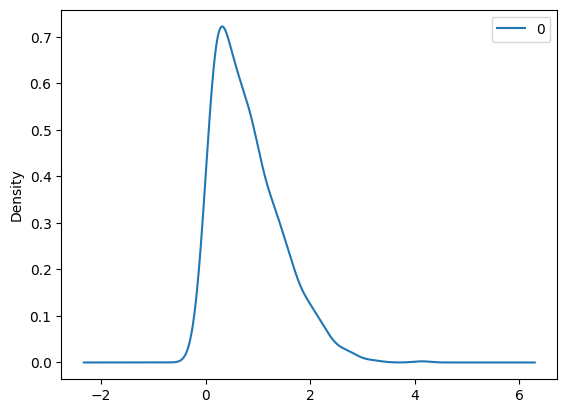

In [82]:
data.plot.kde()

In [85]:
pow_transform = lambda series, pow_factor: np.sign(series) * np.power(np.abs(series), pow_factor)

<Axes: ylabel='Density'>

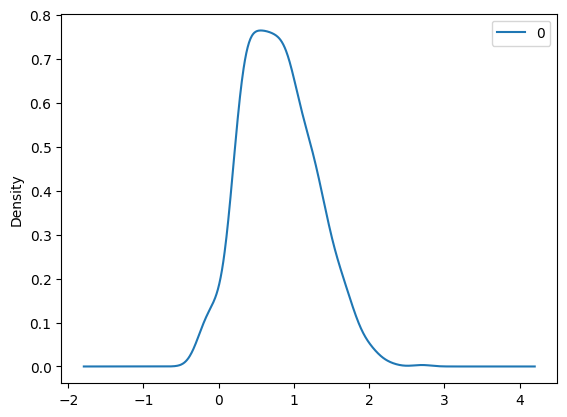

In [91]:
pow_transform(data, 0.7).plot.kde()